In [1]:
from ib_insync import *
import pandas as pd
import ib_connection as IBC
import numpy as np
import big_graphs as BG
from Records import Records

util.startLoop()
ibc, ib = IBC.quick_connect(1)

In [2]:
# all universes: "mega_cap", "industrial", "materials", "transport", "utilities", "banks"

r = Records()
r.tickers = IBC.show_universe("SP500_filtered")
r.dur = "8 Y"
r.size = "1 day"
r.t = 252 * 2  # training days
r.long_window = 400  # rolling windows for betas
r.short_window = 60

===== Running universe: SP500_filtered (463 names) =====
Universe:SP500_filtered
Description : 
  SP500 filtered: tickers with >= 2000 valid dates (non-NaN prices)
Tickers (463):
  MMM, AOS, ABT, ABBV, ACN, ADBE, AMD, AES, AFL, A, APD, AKAM, ALB, ARE, ALGN, ALLE, LNT, ALL, GOOGL, GOOG, MO, AMZN, AEE, AEP, AXP, AIG, AMT, AWK, AMP, AME, AMGN, APH, ADI, AON, APA, APO, AAPL, AMAT, APTV, ACGL, ADM, ARES, ANET, AJG, AIZ, T, ATO, ADSK, ADP, AZO, AVB, AVY, AXON, BKR, BALL, BAC, BAX, BDX, BBY, TECH, BIIB, BLK, BX, XYZ, BK, BA, BKNG, BSX, BMY, AVGO, BR, BRO, BLDR, BG, BXP, CHRW, CDNS, CPT, CPB, COF, CAH, CCL, CVNA, CAT, CBOE, CBRE, CDW, COR, CNC, CNP, CF, CRL, SCHW, CHTR, CVX, CMG, CB, CHD, CI, CINF, CTAS, CSCO, C, CFG, CLX, CME, CMS, KO, CTSH, CL, CMCSA, FIX, CAG, COP, ED, STZ, CPRT, GLW, CPAY, CSGP, COST, CTRA, CCI, CSX, CMI, CVS, DHR, DRI, DVA, DECK, DE, DAL, DVN, DXCM, FANG, DLR, DG, DLTR, D, DPZ, DOV, DHI, DTE, DUK, DD, ETN, EBAY, ECL, EIX, EW, EA, ELV, EME, EMR, ETR, EOG, EPAM, EQT, EFX, E

In [7]:
# Fetch stage: raw prices only (no alignment, no returns computation)
r.fetch_comp(ib, progress=False)

# Multi-market setup in ONE Records object
r.mkt_tickers = ["SPY"]
r.fetch_mkt(ib, progress=False)

# Compute stage: per-market align dates, compute returns, then run all models
r.set_all()


[cache] HIT  path=cache\companies\5f6e105da4775c806f5204a753e51e93.pkl load_sec=0.011 at=2026-01-04 17:48:29
[cache] HIT  path=cache\mkt\81337becbcef75c6c6cd34da371db451.pkl load_sec=0.008 at=2026-01-04 17:48:29
len(returns) = 2001
markets      = ['SPY']
t            = 504
date range   = 2018-01-09 00:00:00 -> 2026-01-02 00:00:00


active_ratio =  0.575818303273213
sharpe_gross =  -0.1299878565640713
sharpe_net =  -0.1761341565769329
mean turnover: 1.1337425095424873
cost.sum() =  0.1697212536785104
equity_net.iloc[-1] =  0.18554969006708244


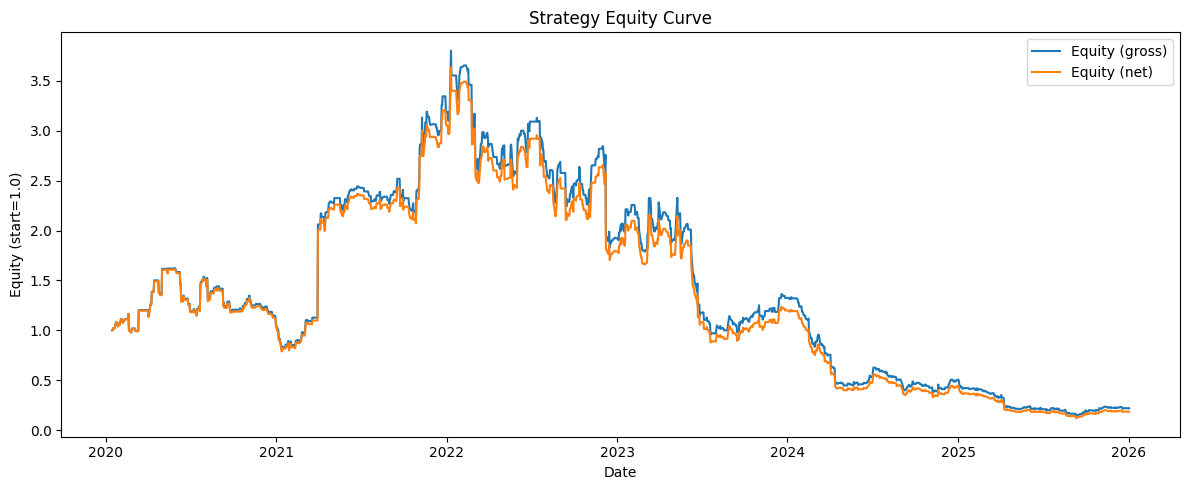

In [9]:
import residual_signal as RS

sig_spy, z_spy = RS.modified_residual_signal(r, mkt="SPY", lamb_hi=0.4, lamb_lo=0.1, gamma=1.0)

weight_spy = RS.extreme_signal_to_weights(r, sig_spy, mkt="SPY")

equity_gross, equity_net = r.pnl_trading(weight_spy, tc_bps=1.0)
BG.plot_equity(equity_gross, equity_net, title="Strategy Equity Curve")


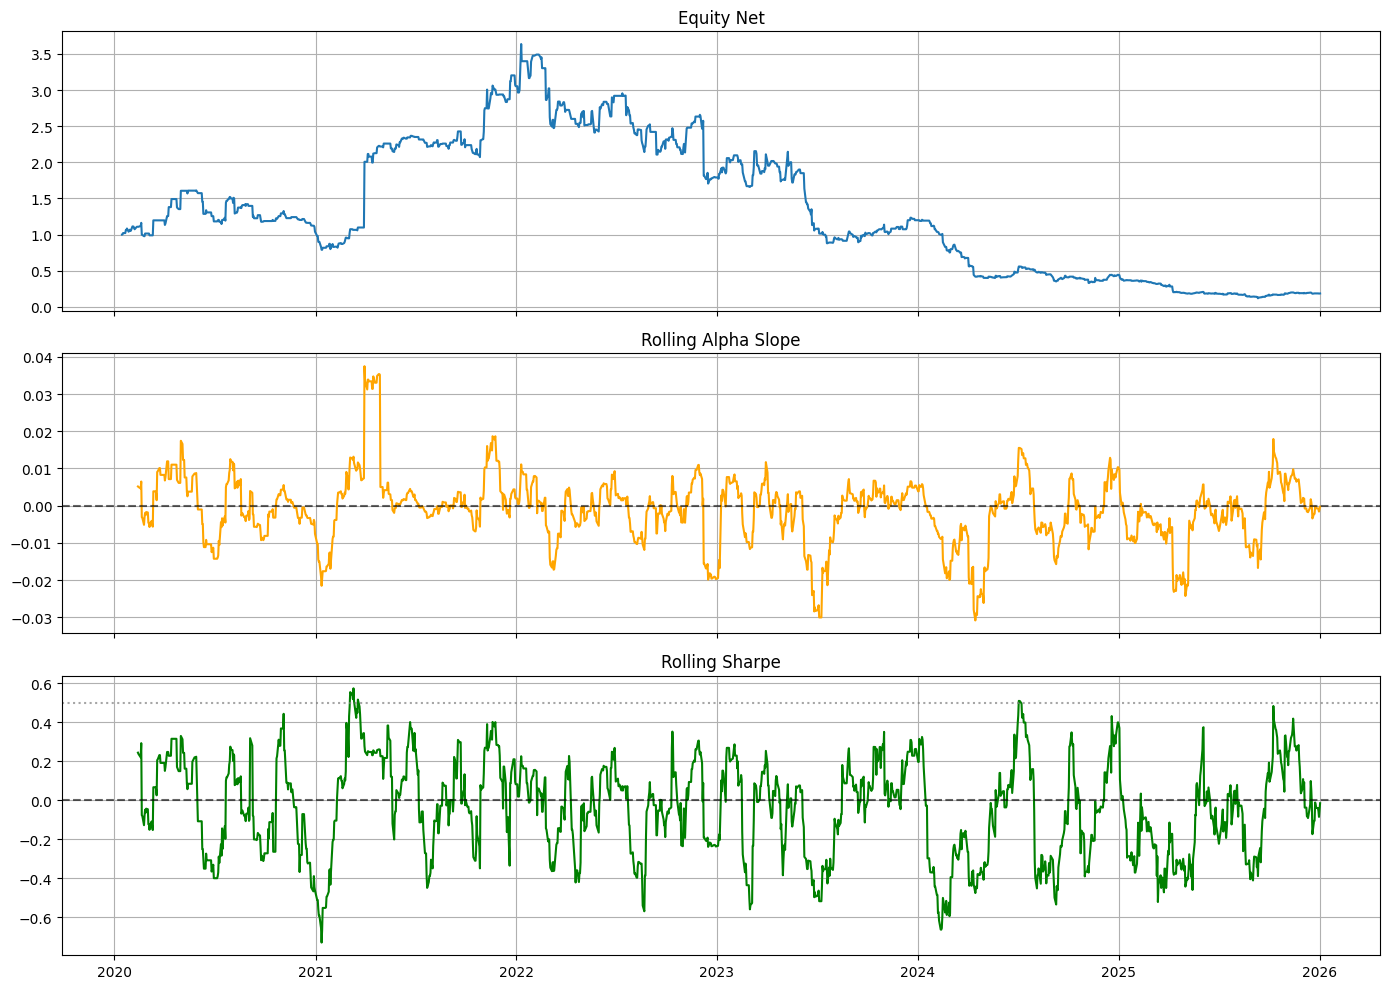

In [10]:
BG.plot_alpha_diff_diagnostics(equity_net, W=20, title_prefix="")